# SIT742: Modern Data Science
**(2022 Assessment Task 02 - Data Analytics)**

---
- Please refer to the CloudDeakin for the detailed assessment requirements.
- Please submit to Clouddeakin before the due date.
- It is a group assignment, and please form a group and self-enrol into the CloudDeakin groups.
- Students with difficulty in meeting the deadline because of illness, etc. must apply for an assignment extension in CloudDeakin no later than *12:00pm on 21/05/2022 (Friday)*.


Prepared by **Said Abdullahi**

---


# Part I - Web Log Data

## Overview

Hotel TULIP a five-star hotel located at Deakin University, and its CIO Dr Bear Guts has asked the Team-SIT742 team to analyse the weblogs files. Hence, Hotel TULIP would like you *Group-SIT742* (a hypothetical data analytics group with up to 3 data analysers) to analyse web log files and discover user accessing patterns of different web pages.

In this part, you are required to use give dataset to finish some required analysis, with the exploreation data analytics skills as well as visuilization skill.


You will be required to complete the coding to answer the questions with a neat and clean format, and you must keep outputs for code. Your commenting and adherence to code standards will also be considered when marking. Further information on Python standards, please visit https://www.python.org/dev/peps/pep-0008/


**Note**: You are not restricted to the partial code provided, and you can write your own code to implement the required tasks. But you should provide sufficient comments.


## 1.Data ETL

### 1.1 Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import datetime
from scipy import stats
import matplotlib

In [ ]:
from ipywidgets import IntProgress
from IPython.display import display
from zipfile import ZipFile
# Read all the web log files (held in a specific directory) and concatenate the data into a single pandas dataframe

# Create a list of all the log files within the directory


all_files = ZipFile('/content/drive/MyDrive/HTWebLog_p1.zip', 'r')
files = all_files.namelist()

data = []
# Define the column names
ColumnNames=['date','time','s-sitename','s-ip','cs-method','cs-uri-stem','cs-uri-query','s-port','cs-username',
             'c-ip','cs(User-Agent)','cs(Referer)','sc-status','sc-substatus','sc-win32-status']
# Create a progress bar to track progress (importing data can take several minutes)
ProgressBar = IntProgress(value=0,min=0,max=len(files),step=1,
                          description='Loading:',bar_style='',orientation='horizontal')
display(ProgressBar)
# Read each of the files using the pandas read csv function within a 'for loop'
# and set data to str for each column to ensure all data loads
for name in all_files.namelist():
    ProgressBar.value += 1
    load_file = pd.read_csv(all_files.open(name),
                            delim_whitespace=True,
                            na_values='-',
                            skiprows = 4,
                            usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14],
                            header=None,
                            encoding='iso-8859-1',
                            names=ColumnNames,
                            error_bad_lines=False,
                            warn_bad_lines=False,
                            dtype={'date': str,'time': str,'s-sitename': str, 's-ip': str,'cs-method': str,'cs-uri-stem': str,
                                   'cs-uri-query': str,'s-port': str,'cs-username': str,'c-ip': str,'cs(User-Agent)': str,
                                   'cs(Referer)': str, 'sc-status': str,'sc-substatus': str,'sc-win32-status': str})

    # There are rows with "#" in files, drop rows starts with "#"
    load_file = load_file[~load_file['date'].str.startswith("#")]

    data.append(load_file)

# Concatenate all the pandas dataframes into a single dataframe
df_ht = pd.concat(data)


print ('Finished loading', ProgressBar.value, 'web log files.')



IntProgress(value=0, description='Loading:', max=120)

Finished loading 120 web log files.


In order to reduce the processing time, we will remove all missing values for data and only select 30% of total data for classification.

**Code**:
    1. Remove all NAs, for the columns, if the column is with 15% NAs, you need to remove that column. Then, for the rows, if there are any NAs in that row, you need to remove that row (requests)  
    2. select 30\% of the total data in to a new dataframe weblog_df.
    
    *Keep the outputs for code in your notebook.

**Report**:
    The number of requests in weblog\_df.


In [ ]:
#Your code to remove missing values as required.
# Print the row count for each column that has a null value
print ('')
print ('Rows with a null value in columns (prior to data cleaning)')
for name in ColumnNames:
    print (name,': ', df_ht[name].isnull().sum().sum())
# # Delete rows with null data
# print ('')
print ('Total Rows prior to removal of null data', len(df_ht))


Rows with a null value in columns (prior to data cleaning)
date :  0
time :  0
s-sitename :  0
s-ip :  0
cs-method :  0
cs-uri-stem :  0
cs-uri-query :  7886532
s-port :  0
cs-username :  8438928
c-ip :  0
cs(User-Agent) :  3527
cs(Referer) :  1308994
sc-status :  0
sc-substatus :  0
sc-win32-status :  0
Total Rows prior to removal of null data 8438928


In [ ]:
#missing value percentage
missing_value = (df_ht.isnull().sum(axis=0)*100/len(df_ht))\
                    .reset_index().rename(
                      columns = {"index": "columns",
                                 0: "% percent of missing value"})\
                          .sort_values(
                              by="% percent of missing value",
                              ascending=False)

print(missing_value[missing_value['% percent of missing value'] != 0])

           columns  % percent of missing value
8      cs-username                  100.000000
6     cs-uri-query                   93.454192
11     cs(Referer)                   15.511378
10  cs(User-Agent)                    0.041794


In [ ]:
# remove columns have above 15% missing value
drop_columns = list(missing_value[missing_value['% percent of missing value'] > 15]['columns'])

print('After dropping columns above 15% missing values\n')
df_ht.drop(columns = drop_columns , axis =1, inplace = True)

print(df_ht.isnull().sum())
print(df_ht.shape)

After dropping columns above 15% missing values

date                  0
time                  0
s-sitename            0
s-ip                  0
cs-method             0
cs-uri-stem           0
s-port                0
c-ip                  0
cs(User-Agent)     3527
sc-status             0
sc-substatus          0
sc-win32-status       0
dtype: int64
(8438928, 12)


In [ ]:
#remove any records with missing values
df_ht.dropna( axis=0 , how = 'any',inplace = True)
print('After drop any records with mising value\n')
print(df_ht.isnull().sum())

After drop any records with mising value

date               0
time               0
s-sitename         0
s-ip               0
cs-method          0
cs-uri-stem        0
s-port             0
c-ip               0
cs(User-Agent)     0
sc-status          0
sc-substatus       0
sc-win32-status    0
dtype: int64


In [ ]:
print ('Total Rows after removal of null data', len(df_ht))

Total Rows after removal of null data 8435401


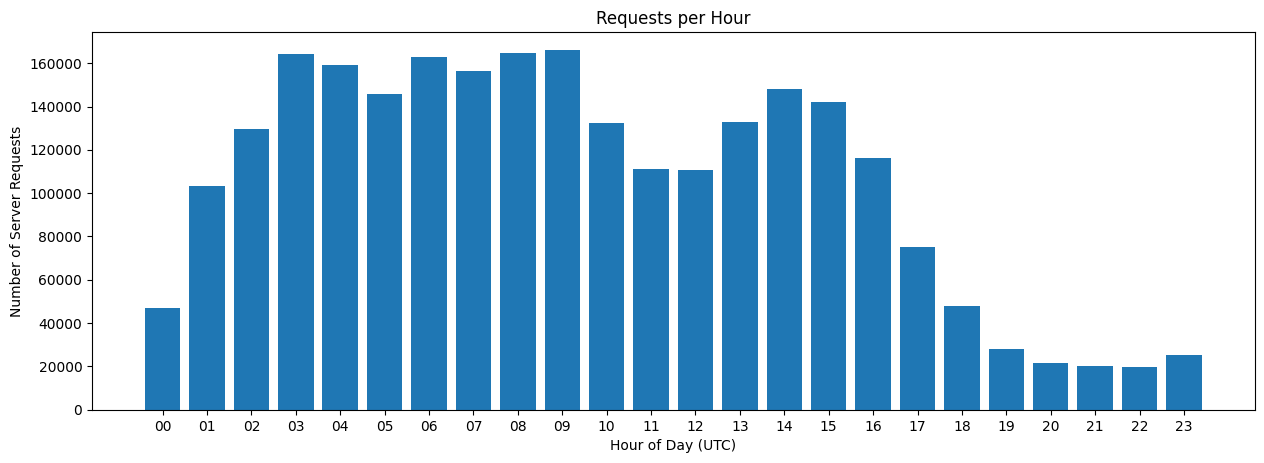

In [ ]:
# only 30% of total data are selected for classification
weblog_df = df_ht.sample(frac = 0.3, random_state=1)

#Your code to show the number of requests in weblog_df
# Create a bar chart of the number of server requests by hour of the day

# Create a new column in the pandas dataframe of the hour-of-the-day
weblog_df['TimeOfDay'] = weblog_df['time'].str[:2]

# Create an array of row counts for each of the hours-of-the-day
uniqueTimeOfDay, countTimeOfDay = np.unique(weblog_df['TimeOfDay'], return_counts=True)

# Plot data with a bar chart and export the chart to a png image file for use in a report
fig, ax = plt.subplots(figsize=(15, 5), dpi=100)
x_pos = np.arange(len(countTimeOfDay))
ax.bar(x_pos, countTimeOfDay, align='center')
ax.set_xlabel('Hour of Day (UTC)')
ax.set_ylabel('Number of Server Requests')
ax.set_title('Requests per Hour')
ax.set_xticks(x_pos)
ax.set_xticklabels(uniqueTimeOfDay)
fig.savefig('HitsPerHour.png', bbox_inches='tight')

In [ ]:
print("\nData size :",weblog_df.shape)
print("\nNumber of records :",len(weblog_df))
print("\nNumber of atrributes :",len(weblog_df.columns))
print('--------------------------------------')

#attribute name
print('\nAttribute name:\n')

print(weblog_df.columns.to_list())
print('--------------------------------------')

print(weblog_df.info(null_counts=True))


Data size : (2530620, 13)

Number of records : 2530620

Number of atrributes : 13
--------------------------------------

Attribute name:

['date', 'time', 's-sitename', 's-ip', 'cs-method', 'cs-uri-stem', 's-port', 'c-ip', 'cs(User-Agent)', 'sc-status', 'sc-substatus', 'sc-win32-status', 'TimeOfDay']
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530620 entries, 25357 to 33575
Data columns (total 13 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   date             2530620 non-null  object
 1   time             2530620 non-null  object
 2   s-sitename       2530620 non-null  object
 3   s-ip             2530620 non-null  object
 4   cs-method        2530620 non-null  object
 5   cs-uri-stem      2530620 non-null  object
 6   s-port           2530620 non-null  object
 7   c-ip             2530620 non-null  object
 8   cs(User-Agent)   2530620 non-null  object
 9   sc-status        253

### 1.2 Feature Selection

**Code**:
    You are required to select *'cs_method'*,*'c_ip'*,*'cs_uri_stem'*,*'cs(User_Agent)'* as input features  and 'sc_status' as class label into a new dataframe ml_df for following Machine Learning Tasks.

*Keep the outputs for code in your notebook.

**Report**:
    1. Data Description of ml_df,  
    2. Print top 5 rows of ml_df.



In [ ]:
# Your code for feature selection

ml_df=weblog_df[['cs-method','c-ip','cs-uri-stem','cs(User-Agent)','sc-status']]

#Your code to show the top 5 rows of ml_df
ml_df.head()

,cs-method,c-ip,cs-uri-stem,cs(User-Agent),sc-status
25357,GET,218.102.231.100,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
89819,GET,218.190.226.30,/Tulip/common/en-us/images/top_logo.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
19333,GET,203.241.147.26,/Tulip/common/en-us/images/sectionbanner_about...,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304
29761,GET,203.85.132.97,/Tulip/public/2899_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
52909,GET,218.186.9.5,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200


In [ ]:
#Data Description
ml_df.describe()

,cs-method,c-ip,cs-uri-stem,cs(User-Agent),sc-status
count,2530620,2530620,2530620,2530620,2530620
unique,6,69837,3616,4653,12
top,GET,59.188.33.66,/Tulip/common/common_style.aspx,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
freq,2525568,27935,121304,594218,1821993


In [ ]:
print("\nData size :",ml_df.shape)
print("\nNumber of records :",len(ml_df))
print("\nNumber of atrributes :",len(ml_df.columns))
print('--------------------------------------')

#attribute name
print('\nAttribute name:\n')

print(ml_df.columns.to_list())
print('--------------------------------------')

print(ml_df.info(null_counts=True))


Data size : (2530620, 5)

Number of records : 2530620

Number of atrributes : 5
--------------------------------------

Attribute name:

['cs-method', 'c-ip', 'cs-uri-stem', 'cs(User-Agent)', 'sc-status']
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2530620 entries, 25357 to 33575
Data columns (total 5 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   cs-method       2530620 non-null  object
 1   c-ip            2530620 non-null  object
 2   cs-uri-stem     2530620 non-null  object
 3   cs(User-Agent)  2530620 non-null  object
 4   sc-status       2530620 non-null  object
dtypes: object(5)
memory usage: 115.8+ MB
None


In [ ]:
#Save to ml_df data to csv
export_file_path="/content/drive/MyDrive/ml_df.csv"
ml_df.to_csv (export_file_path, index = False, header=True)

## 2.Unsupervised Learning
 You are required to complete this part only using **sklearn**.


**Code**:
    1. Perform unsupervised learning on ml_df with K Means, with a varying K from 2 to 10;
    2. Plot in the elbow plot.
    
    *Keep the outputs for code in your notebook.

**Report**:
    1. Figure 'KMeans' in the elbow plot, with a varying K from 2 to 10.



In [ ]:
from sklearn import preprocessing
from sklearn.cluster import KMeans

le_df = ml_df.apply(preprocessing.LabelEncoder().fit_transform)

#check le_df dimensions
print("\nData size for le_df:",le_df.shape)
#Extract features from le_df and change to numpy array
X = le_df.iloc[:, 0:4].values
#check X (features) dimensions
print("\nData size for X:",X.shape)
#Extract the class sc_status from le_df and chang to numpy array
y = le_df.iloc[:, -1].values
#check y (class) dimensions
print("\nData size for y:",y.shape)


Data size for le_df: (2530620, 5)

Data size for X: (2530620, 4)

Data size for y: (2530620,)


In [ ]:
# Change features and label into dataframe
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
print(X_df.head())
print('-----------------------')
print('-----------------------')
print(y_df.head())

   0      1     2     3
0  0  26069  2125   862
1  0  31171  2119  1385
2  0  18482  2093   572
3  0  18825  2741  1385
4  0  30001  2125  1725
-----------------------
-----------------------
   0
0  0
1  0
2  4
3  0
4  0


In [ ]:
#Your code for Kmeans
#K-Means for a range of clusters using a for loop and collecting the distortions into a list.
distortions = []
K = range(2,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_df)
    distortions.append(kmeanModel.inertia_)

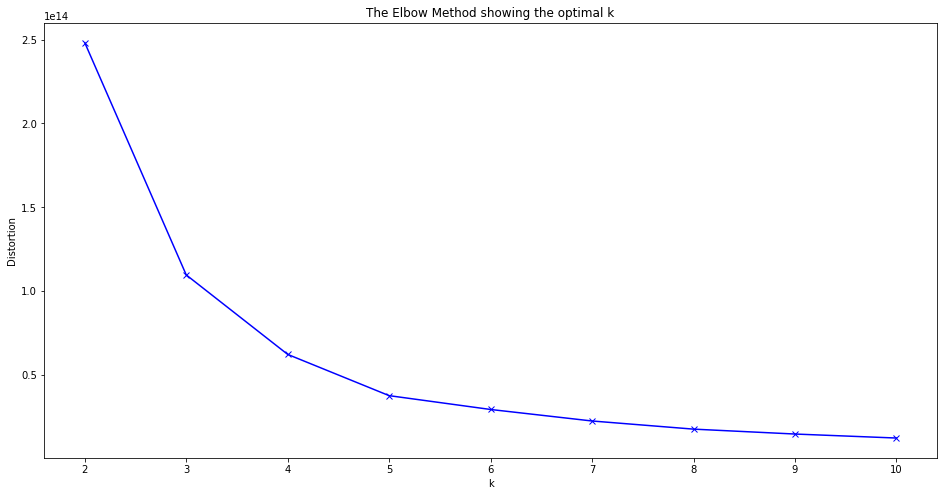

In [ ]:
#Your code for visualizing K means result as elbow plot
#Plotting the elbow method chart
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
#We observe that the “elbow” is the number 3 which is optimal for this case. However its seems ambiguous; not clear.
#Now we can run a K-Means using as n_clusters the number 3.
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(X_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Text(0, 0.5, 'c_ip')

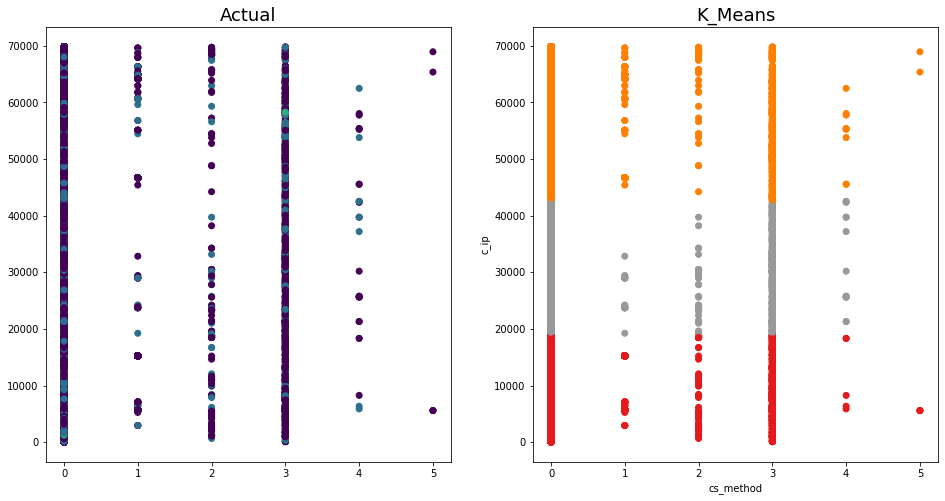

In [ ]:
#K-Means vs Actual for n_clusters=3
le_df['k_means']=kmeanModel.predict(X_df)
le_df['label']= y_df
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_df[0], X_df[1], c=le_df['label'])
axes[1].scatter(X_df[0], X_df[1], c=le_df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)
plt.xlabel("cs_method")
plt.ylabel("c_ip")

## 3.Supervised Learning
 You are required to complete this part only using **PySpark**.


In [ ]:
!apt-get update
# install Java8
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
# download spark 3.1.1
!wget -q http://apache.osuosl.org/spark/spark-3.1.1/spark-3.1.1-bin-hadoop3.2.tgz
# unzip it
!tar xf spark-3.1.1-bin-hadoop3.2.tgz
# install findspark
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"

import findspark
findspark.init()

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-securi

In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

spark = SparkSession.builder.appName('SIT742T2').getOrCreate()

### 3.1 Data Preparation

In order to reduce the processing time, we will select 10% of le_df.

In [ ]:
schema = StructType([StructField("sc_status", IntegerType(), True),
                     StructField("cs_method", IntegerType(), True),
                     StructField("c_ip", IntegerType(), True),
                     StructField("cs_uri_stem", IntegerType(), True),
                     StructField("cs(User_Agent)", IntegerType(), True)])

sl_df = spark.createDataFrame(le_df, schema)

In [ ]:
#Only 10% of the data is used in this part.
sl_df = sl_df.sample(fraction=0.1, seed=1)

In [ ]:
#sl_df data description
print('-------------------------------------sl_df data description-------------------------------------\n')

# Performing an action on the description of the dataset
print(sl_df.describe().show())

-------------------------------------sl_df data description-------------------------------------

+-------+--------------------+------------------+-----------------+------------------+------------------+
|summary|           sc_status|         cs_method|             c_ip|       cs_uri_stem|    cs(User_Agent)|
+-------+--------------------+------------------+-----------------+------------------+------------------+
|  count|              253029|            253029|           253029|            253029|            253029|
|   mean|0.004402657402906386|32334.285489015092|2308.111054464113|1602.2594880428726|1.1484335787597468|
| stddev| 0.10740879784990687|20446.968825174175|542.1337957530682| 908.9667873397796|1.9024425651793417|
|    min|                   0|                 0|                0|                 0|                 0|
|    max|                   5|             69834|             3613|              4652|                11|
+-------+--------------------+------------------+-----

In [ ]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# transformer
vector_assembler = VectorAssembler(inputCols=['cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)'],outputCol="features")
df_temp = vector_assembler.transform(sl_df)
print('Top 3 rows after vector transformation\n')
df_temp.show(3)

Top 3 rows after vector transformation

+---------+---------+----+-----------+--------------+--------------------+
|sc_status|cs_method|c_ip|cs_uri_stem|cs(User_Agent)|            features|
+---------+---------+----+-----------+--------------+--------------------+
|        0|    18825|2741|       1385|             0|[18825.0,2741.0,1...|
|        0|    68103|2425|       1459|             0|[68103.0,2425.0,1...|
|        0|    41459|2087|       4238|             0|[41459.0,2087.0,4...|
+---------+---------+----+-----------+--------------+--------------------+
only showing top 3 rows



In [ ]:
#drop column not needed for modelling leaving label and features
df_sl = df_temp.drop('cs_method', 'c_ip', 'cs_uri_stem', 'cs(User_Agent)')

df_sl.show(3)

+---------+--------------------+
|sc_status|            features|
+---------+--------------------+
|        0|[18825.0,2741.0,1...|
|        0|[68103.0,2425.0,1...|
|        0|[41459.0,2087.0,4...|
+---------+--------------------+
only showing top 3 rows



In [ ]:
#change sc_status to label
df_sl = df_sl.selectExpr("features as features", "sc_status as label")
print('Top 3 rows of features and label')
df_sl.show(3)

Top 3 rows of features and label
+--------------------+-----+
|            features|label|
+--------------------+-----+
|[18825.0,2741.0,1...|    0|
|[68103.0,2425.0,1...|    0|
|[41459.0,2087.0,4...|    0|
+--------------------+-----+
only showing top 3 rows



In [ ]:
#Check the labels in the df_sl dataset
from pyspark.sql.functions import col
print('\n\n---sc_status (label) counts for df_sl---')
df_sl.groupBy("label") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()



---sc_status (label) counts for df_sl---
+-----+------+
|label| count|
+-----+------+
|    0|252516|
|    3|   286|
|    1|   208|
|    2|    15|
|    5|     2|
|    4|     2|
+-----+------+



###  3.2 Decision Tree or Logistic Regression

 <div class="alert alert-block alert-info">

**Code**:
    1. Perform supervised learning on ml\_df with Decision Tree or Logistic Regression,  <br>
    2. Evaluate the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    3. Evaluate the classification result using Precision, Recall and F1 score.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1. Display the classification result using [confusion matrix ](https://en.wikipedia.org/wiki/Confusion_matrix) including TP, TN, FP, FN, <br>
    2. Display the classification result using Precision, Recall and F1 score.
</div>

In [ ]:
#Create the data sets for training and testing
(trainingData, testData) = df_sl.randomSplit([0.7, 0.3])
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 176914
Test Dataset Count: 76115


In [ ]:
#Check the labels in the training data and test data
from pyspark.sql.functions import col
print('\n\n---sc_status counts for trainingData---')
trainingData.groupBy("label") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()
print('\n\n---sc_status counts for testData---')
testData.groupBy("label") \
    .count() \
    .orderBy(col("count").desc()) \
    .show()



---sc_status counts for trainingData---
+-----+------+
|label| count|
+-----+------+
|    0|176559|
|    3|   210|
|    1|   131|
|    2|    10|
|    5|     2|
|    4|     2|
+-----+------+



---sc_status counts for testData---
+-----+-----+
|label|count|
+-----+-----+
|    0|75957|
|    1|   77|
|    3|   76|
|    2|    5|
+-----+-----+



In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Your code contains trainning from train data and predicting based on the test data
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 30)
# Train model.
dtModel = dt.fit(trainingData)
# Make predictions.
dtpredictions = dtModel.transform(testData)


# compute the classification error and accurracy on test data.
evaluator = MulticlassClassificationEvaluator(metricName="accuracy")
accuracy = evaluator.evaluate(dtpredictions)
print("\nThe Accurracy is", accuracy)
print("Test Error = %g" % (1.0 - accuracy))
print('Test Area Under ROC', evaluator.evaluate(dtpredictions))


The Accurracy is 0.9990108281346857
Test Error = 0.000989172
Test Area Under ROC 0.9990108281346857


In [ ]:
# Actual data (label) and the predicted data (label)
print('\n\n---sc_status actual data vs predicted for testData---')
dtpredictions.select("label", "prediction").show(5)



---sc_status actual data vs predicted for testData---
+-----+----------+
|label|prediction|
+-----+----------+
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
|    0|       0.0|
+-----+----------+
only showing top 5 rows





---------------Confusion Matrix----------------
[[75660    19     0     2     0     2]
 [   32    31     0     0     0     0]
 [    5     0     0     0     0     0]
 [   14     0     0    54     0     0]
 [    0     0     0     0     1     0]
 [    0     0     0     0     1     0]]
-----------------------------------------------
-----------------------------------------------


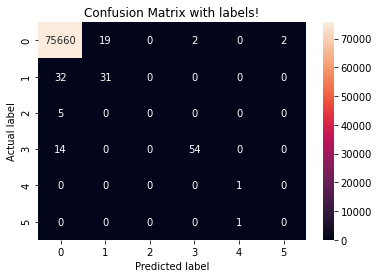

In [ ]:
# Your Code to display the classification results as required.

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import pylab as pl

# Your code to display TP, TN, FP, FN
# First we get the actual label from decion tree (ydt_true) and predicted values (ydt_pred)
ydt_true = dtpredictions.select(['label']).collect()
ydt_pred = dtpredictions.select(['prediction']).collect()
# Make the confusion matrix with ydt_true and ydt_pred
print('\n\n---------------Confusion Matrix----------------')
cm = confusion_matrix(ydt_true, ydt_pred)
print(cm)
print('-----------------------------------------------')
print('-----------------------------------------------')
## The heatmap() function returns a Matplotlib Axes Object.
ax = sns.heatmap(cm, annot=True, fmt='g');
ax.set_title('Confusion Matrix with labels!');
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label');
ax.xaxis.set_ticklabels(['0', '1', '2', '3', '4', '5'])
ax.yaxis.set_ticklabels(['0', '1', '2', '3', '4', '5'])
plt.show()

In [ ]:
# Your code to display TP, TN, FP, FN for decision tree
# Create a function for computation of TP, TN, FP, FN from confusion matrix
def counts_from_confusion(confusion):
    """
    Obtain TP, FN FP, and TN for each class in the confusion matrix
    """

    counts_list = []

    # Iterate through classes and store the counts
    for i in range(confusion.shape[0]):
        tp = confusion[i, i]

        fn_mask = np.zeros(confusion.shape)
        fn_mask[i, :] = 1
        fn_mask[i, i] = 0
        fn = np.sum(np.multiply(confusion, fn_mask))

        fp_mask = np.zeros(confusion.shape)
        fp_mask[:, i] = 1
        fp_mask[i, i] = 0
        fp = np.sum(np.multiply(confusion, fp_mask))

        tn_mask = 1 - (fn_mask + fp_mask)
        tn_mask[i, i] = 0
        tn = np.sum(np.multiply(confusion, tn_mask))

        counts_list.append({'Class': i,
                            'TP': tp,
                            'FN': fn,
                            'FP': fp,
                            'TN': tn})

    return counts_list

In [ ]:
# Computation of TP, FN, FP, TN using function
confusion_matrix_counts = counts_from_confusion(cm)
print(confusion_matrix_counts)
# Create from the above computation
print('-----------------------------------------------')
print('-----------------------------------------------')
cm_df_counts = pd.DataFrame(confusion_matrix_counts)
print(cm_df_counts)

[{'Class': 0, 'TP': 75660, 'FN': 23.0, 'FP': 51.0, 'TN': 87.0}, {'Class': 1, 'TP': 31, 'FN': 32.0, 'FP': 19.0, 'TN': 75739.0}, {'Class': 2, 'TP': 0, 'FN': 5.0, 'FP': 0.0, 'TN': 75816.0}, {'Class': 3, 'TP': 54, 'FN': 14.0, 'FP': 2.0, 'TN': 75751.0}, {'Class': 4, 'TP': 1, 'FN': 0.0, 'FP': 1.0, 'TN': 75819.0}, {'Class': 5, 'TP': 0, 'FN': 1.0, 'FP': 2.0, 'TN': 75818.0}]
-----------------------------------------------
-----------------------------------------------
   Class     TP    FN    FP       TN
0      0  75660  23.0  51.0     87.0
1      1     31  32.0  19.0  75739.0
2      2      0   5.0   0.0  75816.0
3      3     54  14.0   2.0  75751.0
4      4      1   0.0   1.0  75819.0
5      5      0   1.0   2.0  75818.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
#Classification report
ydt_true = dtpredictions.select(['label']).collect()
ydt_pred = dtpredictions.select(['prediction']).collect()
print(classification_report(ydt_true, ydt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     75683
           1       0.62      0.49      0.55        63
           2       0.00      0.00      0.00         5
           3       0.96      0.79      0.87        68
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1

    accuracy                           1.00     75821
   macro avg       0.51      0.55      0.51     75821
weighted avg       1.00      1.00      1.00     75821



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 3.3 K-fold Cross-Validation
You are required to use K-fold cross validation to find out the best hyper-parameter set, where K = 2.
<div class="alert alert-block alert-info">

**Code**:
Implement 2-fold cross validation for three (any three) classification models, where K = 2.
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on hyper-parameters based on this cross-validation  results (Best results).
</div>

In [ ]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.mllib.classification import LogisticRegressionWithLBFGS
from pyspark.ml.classification import LogisticRegression
from pyspark.mllib.util import MLUtils

# K = 2
# Your code for 2-fold cross validation
lr = LogisticRegression(maxIter=20, regParam=0.3, elasticNetParam=0)

from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
# Create ParamGrid for Cross Validation
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.1, 0.3, 0.5]) # regularization parameter
             .addGrid(lr.elasticNetParam, [0.0, 0.1, 0.2]) # Elastic Net Parameter (Ridge = 0)
#            .addGrid(model.maxIter, [10, 20, 50]) #Number of iterations
#            .addGrid(idf.numFeatures, [10, 100, 1000]) # Number of features
             .build())

# Create 2-fold CrossValidator
cv = CrossValidator(estimator=lr, \
                    estimatorParamMaps=paramGrid, \
                    evaluator=evaluator, \
                    numFolds=2)

# Run cross validations
cvModel = cv.fit(trainingData)
#The amount of models that we're creating and testing
lr_predict_train=cvModel.transform(trainingData)
lr_predict_test=cvModel.transform(testData)
#Evaluate the model
print('RMSE:', evaluator.evaluate(lr_predict_test))
print("The area under ROC for train set after CV  is {}".format(evaluator.evaluate(lr_predict_train)))
print("The area under ROC for test set after CV  is {}".format(evaluator.evaluate(lr_predict_test)))

RMSE: 0.9981452737365499
The area under ROC for train set after CV  is 0.9978983881993367
The area under ROC for test set after CV  is 0.9981452737365499


In [ ]:
#What is the number of models to be tested
print('Number of models to be tested: ', len(paramGrid))

Number of models to be tested:  9


In [ ]:
# best model for the logistic regression after 2-fold cross validation
bestModel = cvModel.bestModel
print(bestModel)

LogisticRegressionModel: uid=LogisticRegression_b99d849cc893, numClasses=6, numFeatures=4


In [ ]:
#The best hyperparameters for logistic regression after 2-fold cross validation
print('The best regularization parameter is: ', bestModel.getRegParam())
print('The best Elastic Net Parameter is: ', bestModel.getElasticNetParam())
print('The best Number of iterations is: ', bestModel.getMaxIter())

The best regularization parameter is:  0.1
The best Elastic Net Parameter is:  0.0
The best Number of iterations is:  20


In [ ]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator

# Create an initial RandomForest model.
rf = RandomForestClassifier(labelCol='label', featuresCol='features',
                            maxBins=20, subsamplingRate=0.7,
                            minInfoGain= 1e-05,
                            featureSubsetStrategy='all',
                            minInstancesPerNode=2)

# Evaluate model
rfevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")

# Create ParamGrid for Cross Validation
rfparamGrid = (ParamGridBuilder()
             #.addGrid(rf.maxDepth, [2, 5, 10, 20, 30])
               .addGrid(rf.maxDepth, [2, 5, 10])
             #.addGrid(rf.maxBins, [10, 20, 40, 80, 100])
               .addGrid(rf.maxBins, [5, 10, 20])
             #.addGrid(rf.numTrees, [5, 20, 50, 100, 500])
               .addGrid(rf.numTrees, [5, 20, 50])
             .build())

# Create 2-fold CrossValidator
rf_cv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rfparamGrid,
                      evaluator = rfevaluator,
                      numFolds = 2)

# Run cross validations.
rf_cvModel = rf_cv.fit(trainingData)
print(rf_cvModel)

# Use test set here so we can measure the accuracy of our model on new data
rf_predict_train=rf_cvModel.transform(trainingData)
rf_predictions = rf_cvModel.transform(testData)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('RMSE:', rfevaluator.evaluate(rf_predictions))
print("The area under ROC for train set after CV  is {}".format(rfevaluator.evaluate(rf_predict_train)))
print("The area under ROC for test set after CV  is {}".format(rfevaluator.evaluate(rf_predictions)))

CrossValidatorModel_fc1438065ee1
RMSE: 0.10129555565123399
The area under ROC for train set after CV  is 0.10811704474248778
The area under ROC for test set after CV  is 0.10129555565123399


In [ ]:
# best model for the random forest after 2-fold cross validation
rf_bestModel = rf_cvModel.bestModel
rf_bestModel

RandomForestClassificationModel: uid=RandomForestClassifier_ad29cdf23ba6, numTrees=5, numClasses=6, numFeatures=4

In [ ]:
#The best hyperparamter for the Random Forest Model
print('Best Model:\n\t-maxDepth =', rf_bestModel.getMaxDepth())
print('\t-maxBins = ', rf_bestModel.getMaxBins())
print('\t-numTrees = ', rf_bestModel.getNumTrees)

Best Model:
	-maxDepth = 5
	-maxBins =  10
	-numTrees =  5


In [ ]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
# Create initial Decision Tree Model
dt = DecisionTreeClassifier(labelCol="label", featuresCol="features", maxDepth=2)

dtevaluator = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")

# Create ParamGrid for Cross Validation
dtparamGrid = (ParamGridBuilder()
             .addGrid(dt.maxDepth, [2, 5, 10, 20, 30])
             .addGrid(dt.maxBins, [10, 20, 40, 80, 100])
             .build())
# Create 2-fold CrossValidator
dtcv = CrossValidator(estimator = dt,
                      estimatorParamMaps = dtparamGrid,
                      evaluator = evaluator,
                      numFolds = 2)
# Run cross validations.
dtcvModel = dtcv.fit(trainingData)
print(dtcvModel)

# Use test set here so we can measure the accuracy of our model on new data
dtpredict_train=dtcvModel.transform(trainingData)
dtpredictions = dtcvModel.transform(testData)

# cvModel uses the best model found from the Cross Validation
# Evaluate best model
print('RMSE:', evaluator.evaluate(dtpredictions))
print("The area under ROC for train set after CV  is {}".format(evaluator.evaluate(dtpredict_train)))
print("The area under ROC for test set after CV  is {}".format(evaluator.evaluate(dtpredictions)))

CrossValidatorModel_bb3d77aec8b2
RMSE: 0.9991449843466365
The area under ROC for train set after CV  is 0.9994971950261854
The area under ROC for test set after CV  is 0.9991449843466365


In [ ]:
# best model for the decision tree after 2-fold cross validation
dt_bestmodel = dtcvModel.bestModel
print(dt_bestmodel)

DecisionTreeClassificationModel: uid=DecisionTreeClassifier_a69a7295badb, depth=10, numNodes=155, numClasses=6, numFeatures=4


In [ ]:
#The best hyperparamter for the decision tree Model
print('numTrees - ', dt_bestmodel.getMaxBins())
print('maxDepth - ', dt_bestmodel.getMaxDepth())

numTrees -  100
maxDepth -  10


## 4.Association Rule Mining
<div class="alert alert-block alert-info">

**Code**:
Implement association rule mining with a suitable threshold for support, and confidence
    <br>
    *Keep the outputs for code in your notebook.

**Report**:
    1.  Your code design and running results, <br>
		2.  Your findings on on ARMing results.
</div>

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5975 sha256=c175c4be527ef9ba4f53fc873d91795c7539b73cf1e9ca78bc9a717f8489c05d
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
#Load the ml_df dataset
ar_df = pd.read_csv('/content/drive/MyDrive/ml_df.csv', header='infer')

In [ ]:
#Check the first 5 rows of the dataset
ar_df.head()

,cs-method,c-ip,cs-uri-stem,cs(User-Agent),sc-status
0,GET,218.102.231.100,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
1,GET,218.190.226.30,/Tulip/common/en-us/images/top_logo.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
2,GET,203.241.147.26,/Tulip/common/en-us/images/sectionbanner_about...,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304
3,GET,203.85.132.97,/Tulip/public/2899_2.jpg,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200
4,GET,218.186.9.5,/Tulip/common/en-us/images/topmenu_zh-hk.gif,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,200


In [ ]:
#Create a loop to put dataset into a list as strings
transactions = []

with open('/content/drive/MyDrive/ml_df.csv') as f:
    for line in f:
        transaction = [item for item in line.strip().split(',') if item != 'NaN']
        transactions.append(transaction)
#Check part of the list from the transactions
print(transactions[253052:253055])

[['GET', '221.126.232.185', '/Tulip/dining/zh-hk/images/heading_skylounge.gif', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1)', '200'], ['GET', '203.135.196.151', '/Tulip/includes/js/CommonUtil.js', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1)', '304'], ['GET', '58.177.25.190', '/Tulip/common/zh-hk/images/sidebanner_1.jpg', 'Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+5.1;+SV1;+.NET+CLR+1.1.4322)', '200']]


In [ ]:
#Training Apriori on the dataset
from apyori import apriori
rules = list(apriori(
    transactions,
    min_support=0.03, #0.003
    min_confidence=0.2,
    min_length=0.5,
#Choose minimum lift 1 because anything below seems to insignificant
    min_lift = 1.0, #0.5,
    max_length=2
    ))

# Prints one rule
print(rules[0])

RelationRecord(items=frozenset({'200'}), support=0.7199786139449565, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'200'}), confidence=0.7199786139449565, lift=1.0)])


In [ ]:
#number of sets given support = 0.03, confidence = 0.2, and lift=1
print(len(rules))

16


In [ ]:
#Convert to a dataframe.
#We'll add a From and To field to the dataframe, to show the rule antecedent and consequent respectively.
#Hence for a rule of the form A->B. The From will contain A and To will contain B.

rules_df = pd.DataFrame(
    [{'From': list(rule[0])[0],
    'To': list(rule[0])[1],
    'Support': rule[1],
    'Confidence': rule[2][0][2],
    'Lift': rule[2][0][3]} for rule in rules if len(rule[0]) == 2])
rules_df = rules_df.dropna()

rules_df.head(20)

,From,To,Support,Confidence,Lift
0,/Tulip/common/common_style.aspx,200,0.047934,1.000000,1.388930
1,/Tulip/common/common_style.aspx,GET,0.047931,0.999918,1.001918
2,200,GET,0.718983,0.718983,1.000000
3,200,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,0.052367,0.734968,1.020819
4,GET,304,0.253259,0.253259,1.000000
5,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304,0.049711,0.260779,1.029692
6,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304,0.063546,0.250913,1.068574
7,GET,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,0.034481,0.998947,1.000945
8,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,GET,0.071111,0.998031,1.000028
9,GET,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,0.190435,0.998999,1.000997


In [ ]:
# Pick top rules
rules_df = rules_df.sort_values('Support', ascending=False).head(50)

# List of all items
items = set(rules_df['From']) | set(rules_df['To'])

# Creates a mapping of items to numbers
imap = {item : i for i, item in enumerate(items)}

# Maps the items to numbers and adds the numeric 'FromN' and 'ToN' columns
rules_df['FromN'] = rules_df['From'].map(imap)
rules_df['ToN'] = rules_df['To'].map(imap)

# Displays the top 20 association rules, sorted by Support
rules_df.head(20)

,From,To,Support,Confidence,Lift,FromN,ToN
2,200,GET,0.718983,0.718983,1.000000,3,1
4,GET,304,0.253259,0.253259,1.000000,1,7
10,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,GET,0.234576,0.234576,1.000000,8,1
9,GET,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,0.190435,0.998999,1.000997,1,6
8,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,GET,0.071111,0.998031,1.000028,2,1
6,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304,0.063546,0.250913,1.068574,8,7
3,200,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,0.052367,0.734968,1.020819,3,2
5,Mozilla/4.0+(compatible;+MSIE+6.0;+Windows+NT+...,304,0.049711,0.260779,1.029692,6,7
0,/Tulip/common/common_style.aspx,200,0.047934,1.000000,1.388930,0,3
1,/Tulip/common/common_style.aspx,GET,0.047931,0.999918,1.001918,0,1


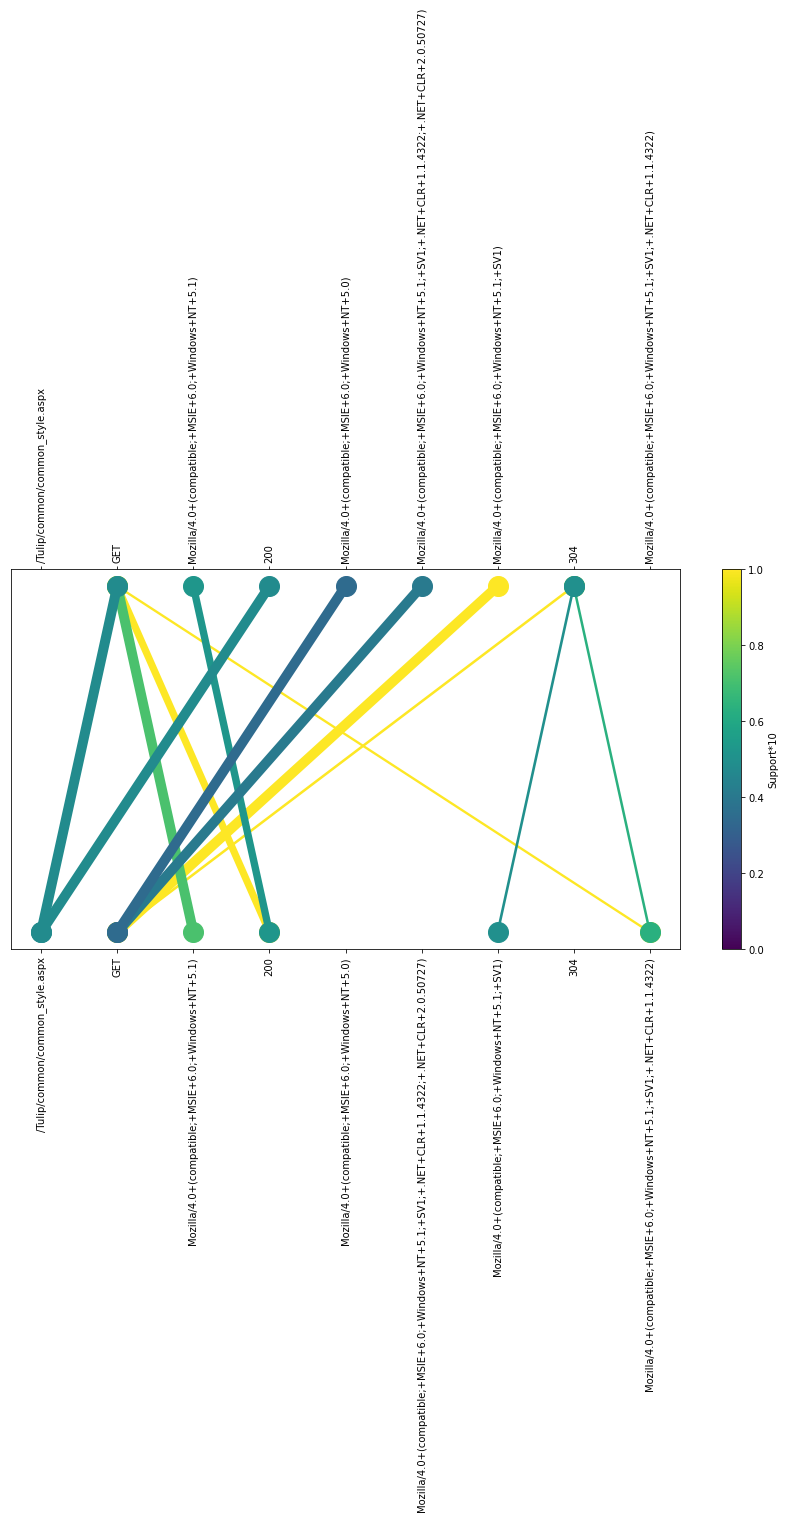

In [ ]:
# Adds ticks to the top of the graph also
plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True

# Sets the size of the plot
fig = plt.figure(figsize=(15, 7))

# Draws a line between items for each rule
# Colors each line according to the support of the rule
for index, row in rules_df.head(20).iterrows():
    plt.plot([row['FromN'], row['ToN']], [0, 1], 'o-',
             c=plt.cm.viridis(row['Support'] * 10),
             markersize=20,
             lw=row['Confidence'] * 10)

# Adds a colorbar and its title
cb = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'))
cb.set_label('Support*10')

# Adds labels to xticks and removes yticks
plt.xticks(range(len(items)), items, rotation='vertical')
plt.yticks([])
plt.show()

# Part II - Web Crawling

## Overview
In 2021,
to better introduce and understand the research works on the professors,
Deakin university wants to perform the citation prediction on individual professor level.
You are required to implement a web crawler to crawl the *citation* information
for A/Professor Gang Li from 2003 to 2021 (start at 2003 and end at 2021),
and also conduct several prediction coding tasks.
You will need to make sure that
the web crawling code and prediction code meets the requirements.
You are free to use any **Python** package for Web crawling and prediction
by finishing below tasks.  


## 5.Crawl Gang Li citation information from 2003 to 2021

 <div class="alert alert-block alert-info">

**Code**:
    You are required to write the code to generate the csv for Gang Li's citation from 2003 to 2021
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
!pip install scholarly

     |████████████████████████████████| 911kB 8.6MB/s 
     |████████████████████████████████| 2.9MB 37.8MB/s 
     |████████████████████████████████| 51kB 5.8MB/s 
     |████████████████████████████████| 9.2MB 39.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 3.2MB 40.0MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 552kB 33.9MB/s 
  Created wheel for stem: filename=stem-1.8.0-cp37-none-any.whl size=436039 sha256=862a22b420c300c02b60327f066a4aef97df9871ef704642565c383f6faa8507
  Stored in directory: /root/.cache/pip/wheels/02/3a/ee/1094b166e029353f892c0b121aa02f48aff5e658396924bc2a
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13485 sha256=c80dc58ebd89b81941391efa9ec36f8c119b03f505152086e94aba3bd7ae8fe7
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for bibtexpar

In [ ]:
!pip install "statsmodels==0.11.1"

     |████████████████████████████████| 8.7MB 5.1MB/s 
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
# Your code to crawl and generate the csv, and save it to variable create_df


# Your code to crawl and generate the csv, and save it to variable create_df
import pandas as pd
from scholarly import scholarly

# This function crawls the citation information for A Professor and returns a dataframe called create_df
#input author id , in this assigment we are only using id 'dqwjm-0AAAAJ'
def get_professor_citation_info(id):
    author = scholarly.search_author_id(id)
    citations_by_year = scholarly.fill(author, sections=['counts'])['cites_per_year']
    year = citations_by_year.keys()
    Citation = citations_by_year.values()
    #Create a dataframe containing column 'year' & 'Citation'
    create_df = pd.DataFrame()
    create_df['year'] = citations_by_year.keys()
    create_df['Citation'] = citations_by_year.values()
    return  create_df
#end of function


#display the create_df variable
create_df=get_professor_citation_info('dqwjm-0AAAAJ')
print('diplaying create_df below \n')
print(create_df)


#Save the create_df containig the year and citation count list to csv
create_df.to_csv('Citation2003-2021.csv')
print('\n saved create_df to a the file Citation2003-2021.csv')



diplaying create_df below 

    year  Citation
0   2003        15
1   2004        34
2   2005        17
3   2006        11
4   2007        33
5   2008        41
6   2009        57
7   2010        68
8   2011       105
9   2012       129
10  2013       172
11  2014       251
12  2015       290
13  2016       339
14  2017       386
15  2018       450
16  2019       579
17  2020       838
18  2021       315

 saved create_df to a the file Citation2003-2021.csv


## 6.Train Arima to predict the 2018 to 2020 citation

### 6.1 Train Arima Model
 <div class="alert alert-block alert-info">

**Code**:
    You will need to use the create_df and then perform the
Arima training with parameter of $p=1$, $q=1$ and $d=1$ on data from 2003 to 2017 (15 years)
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
# your code to use create_df to split the data into train (year 2003 to 2017) and test

# split into train and test sets
X = create_df.set_index('year').values
X = X.astype('float32')
size = 15
train, test = X[0:size], X[size:]

# fit an ARIMA model
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   15
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -62.283
Date:                Sat, 22 May 2021   AIC                            130.565
Time:                        00:08:50   BIC                            132.482
Sample:                             0   HQIC                           130.388
                                 - 15                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9486      0.240      3.950      0.000       0.478       1.419
ma.L1         -0.4599      0.652     -0.705      0.481      -1.738       0.818
sigma2       387.7366    165.805      2.339      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


### 6.2 Predicting the citation and Calculate the RMSE
 <div class="alert alert-block alert-info">

**Code**:
    you will need to use the trained Arime model to predict the citation on year 2018, 2019 and 2020.
You will need to perform the evaluation by comparing the predicted citation from 2018 to 2020 with
the true citation from 2018 to 2020 and calculate the RMSE (root mean square error).
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to predict the citation and save it to variable preds. You may need to output the confidence interval(95%) here as well
# forecast
result = model_fit.get_forecast(4)
preds = result.predicted_mean
print("Predictions : ")
print(preds)
ci = result.conf_int(0.05)


Predictions : 
[429.16466006 470.10947884 508.94861676 545.79036326]


In [ ]:
# Print the error below by comparing the test and preds:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

rmse = sqrt(mean_squared_error(test, preds))
print('Test RMSE: %.3f' % rmse)


# Your code to show the performance RMSE

Test RMSE: 208.465


### 6.3 Draw the visualization to compare

 <div class="alert alert-block alert-info">

**Code**:
   You will also need to use matplotlib to draw the line plot with training data from 2013 to 2017,
the testing truth, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

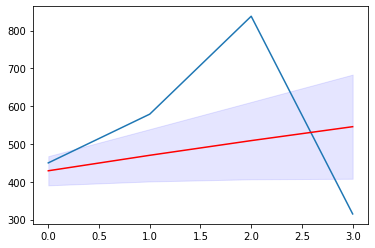

In [ ]:
# You code: Visualize as required, the prediction with its confidence interval
# You code: Visualize as required, the prediction with its confidence interval
import matplotlib.pyplot as plt
plt.plot(test)
plt.plot(preds, color='red')
plt.fill_between(list(range(len(test))),
                 np.array(ci)[:,0], np.array(ci)[:,1],
                alpha=0.1, color='b')

plt.show()

## 7.Conduct the Grid Search with paramter selection and then predict the 2021 and 2022

### 7.1 Grid Search
 <div class="alert alert-block alert-info">

**Code**:
  You will need to run the grid search for parameter $p=[1,2]$,
$q=[1,2]$,
$d=[1,2]$
with training data on year 2003 to 2017 and testing data on 2018 to 2020
The result of the search on each paratemer combination (eg: p=1,q=1,d=1)
will need to be stored in the "search-results.csv",
The search-results.csv will have the column of "RMSE" and column "PARAMETER".
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to run grid search
p = list(range(1,3))
q = list(range(1,3))
d = list(range(1,3))
predictions = list()
RMSE = []
PARAMETER = []
for i1 in p:
    for i2 in q:
        for i3 in d:
            model = ARIMA(train, order=(i1,i3,i2))
            model_fit = model.fit()
            result = model_fit.get_forecast(3)
            predictions = result.predicted_mean
            rmse = sqrt(mean_squared_error(test[:-1], predictions))
            predictions = list()
            RMSE.append(rmse)
            PARAMETER.append((i1,i2,i3))
            print('Test RMSE: %.3f' % rmse,i1,i2,i3)




In [ ]:
# your code to generate the seach-results.csv and print the top 6 rows
#Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
#Results.head(6)

# your code to generate the seach-results.csv and print the top 6 rows
Results = pd.DataFrame({'RMSE':RMSE,'Parameter':PARAMETER})
print(Results.head(6))

Results.to_csv('search-results.csv')



         RMSE  Parameter
0  200.471170  (1, 1, 1)
1  187.030877  (1, 1, 2)
2  204.551111  (1, 2, 1)
3  175.418797  (1, 2, 2)
4  200.148123  (2, 1, 1)
5  197.369414  (2, 1, 2)


### 7.2 TRAIN With Best Parameter Set with data up to 2020 and Predict the 2021 and 2022

<div class="alert alert-block alert-info">

**Code**:
  You will need to perform the training with Arima on data from 2003 to 2020 with best parameter you have found in last task,
and then conduct the prediction for year 2021 and 2022.
    <br>
    *Keep the outputs for code in your notebook.
</div>

In [ ]:
# your code to perform the Arima train on data 2003 to 2020
#train = create_df.citation_all.values[:-1]
train = create_df.Citation.values[:-1]
model = ARIMA(train, order=(1,2,2))
model_fit = model.fit()
result = model_fit.get_forecast(2)


# Your code to predict for 2021 and 2022
predictions = result.predicted_mean

ci = result.conf_int(0.05)
#Show the predictions for 2021 and 2022
print(predictions)



[1179.89560204 1590.8355358 ]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<div class="alert alert-block alert-info">

**Code**:
  You will also need to use matplotlib to draw the line plot with training data from 2013 to 2020, the prediction and also the confidence interval (95%).
    <br>
    *Keep the outputs for code in your notebook.
</div>

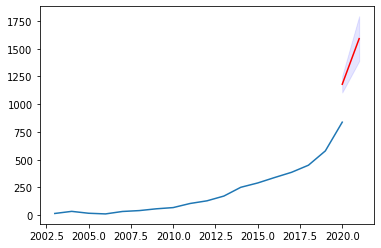

In [ ]:
# Plot the points and the prediction with its confidence interval

plt.plot(list(range(2003,2003+len(train))),train)

plt.plot(list(range(2003+len(train)-1,2003+len(train)+1)), predictions, color='red')
plt.fill_between(list(range(2003+len(train)-1,2003+len(train)+1)),
                 np.array(ci)[:,0], np.array(ci)[:,1],
                alpha=0.1, color='b')

plt.show()

# Part III - Self-Reflective Essay

## Overview

Please check the assessment task specification details.


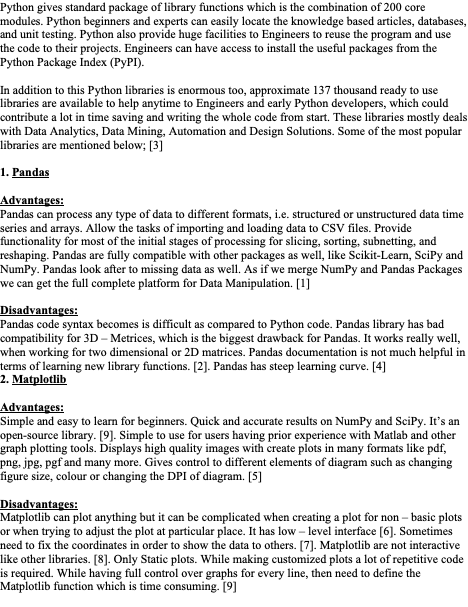

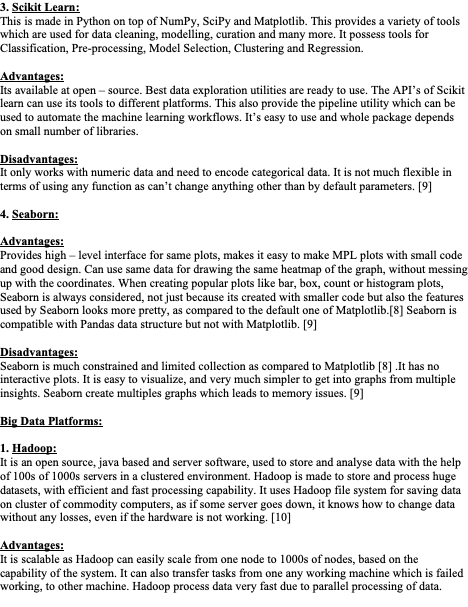

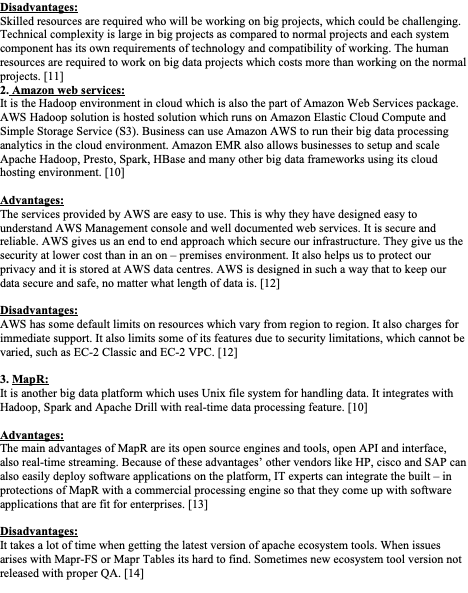

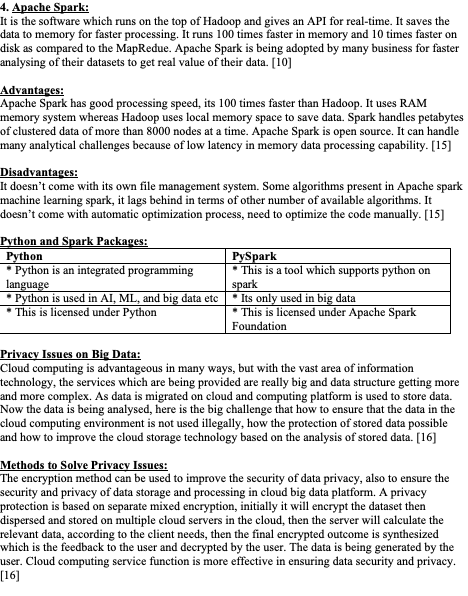

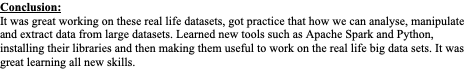

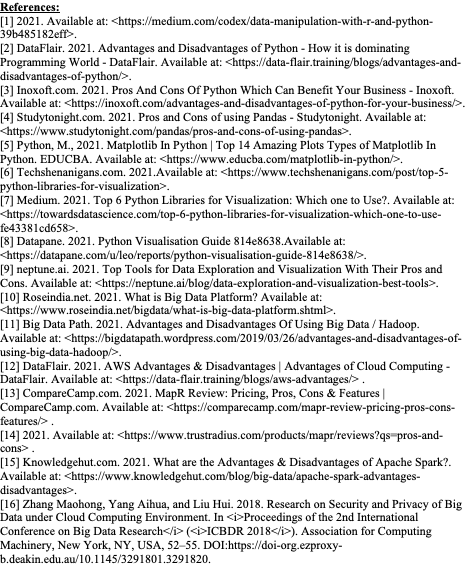